# Arbre-tree 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point,polygon
import contextily as ctx
import missingno as msno

df = pd.read_csv('p2-arbres-fr.csv', delimiter=';')

In [2]:
# J'importe le fichier geojson
df = gpd.read_file('les-arbres.geojson')

In [3]:
df.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
0,204538,Arbre,Alignement,PARIS 12E ARRDT,23,None,AVENUE DU BEL AIR,000103027,Erable,Acer,platanoides,''Columnare'',20,5,Jeune (arbre),NON,POINT (2.39702 48.84681)
1,233243,Arbre,Alignement,PARIS 19E ARRDT,None,None,RUE DE BELLEVILLE,002901003,Sophora,Styphnolobium,japonicum,None,120,15,Adulte,NON,POINT (2.40119 48.87590)
2,108249,Arbre,Jardin,PARIS 16E ARRDT,Canton 03,None,JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE,000303010,If,Taxus,baccata,''Lutea'',52,3,Adulte,NON,POINT (2.28903 48.86010)
3,133954,Arbre,Jardin,PARIS 17E ARRDT,None,None,SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL,000103001,Tilleul,Tilia,x europaea,''Pallida'',65,7,Jeune (arbre)Adulte,NON,POINT (2.31786 48.89408)
4,139945,Arbre,Jardin,PARIS 19E ARRDT,None,None,JARDIN ILOT RIQUET,00000101,Charme,Carpinus,betulus,None,85,9,Adulte,NON,POINT (2.37540 48.89040)


In [4]:
df.info()    

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 208904 entries, 0 to 208903
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   idbase              208904 non-null  int64   
 1   typeemplacement     208904 non-null  object  
 2   domanialite         208904 non-null  object  
 3   arrondissement      208904 non-null  object  
 4   complementadresse   60337 non-null   object  
 5   numero              0 non-null       object  
 6   adresse             208904 non-null  object  
 7   idemplacement       208904 non-null  object  
 8   libellefrancais     195921 non-null  object  
 9   genre               208902 non-null  object  
 10  espece              206285 non-null  object  
 11  varieteoucultivar   40070 non-null   object  
 12  circonferenceencm   208904 non-null  int64   
 13  hauteurenm          208904 non-null  int64   
 14  stadedeveloppement  161831 non-null  object  
 15  remarquab

In [5]:
df.shape

(208904, 17)

In [6]:
df.describe(include='all')

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
count,2.089040e+05,208904,208904,208904,60337,0,208904,208904,195921,208902,206285,40070,208904.000000,208904.000000,161831,187311,208904
unique,NaN,1,9,25,5177,0,7442,63970,202,185,571,524,NaN,NaN,4,2,208810
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,2,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,000101001,Platane,Platanus,x hispanica,''Baumannii'',NaN,NaN,Adulte,NON,POINT (2.361824759598679 48.82732751870307)
freq,NaN,208904,107331,17650,840,NaN,2961,2316,42314,42570,37145,4814,NaN,NaN,78545,187124,2
mean,5.016561e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.894550,8.814958,NaN,NaN,NaN
std,6.711236e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.001688,5.934766,NaN,NaN,NaN
min,9.987400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,1.609198e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,NaN,NaN
50%,2.305115e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,NaN,NaN
75%,2.859412e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,NaN,NaN


<Axes: >

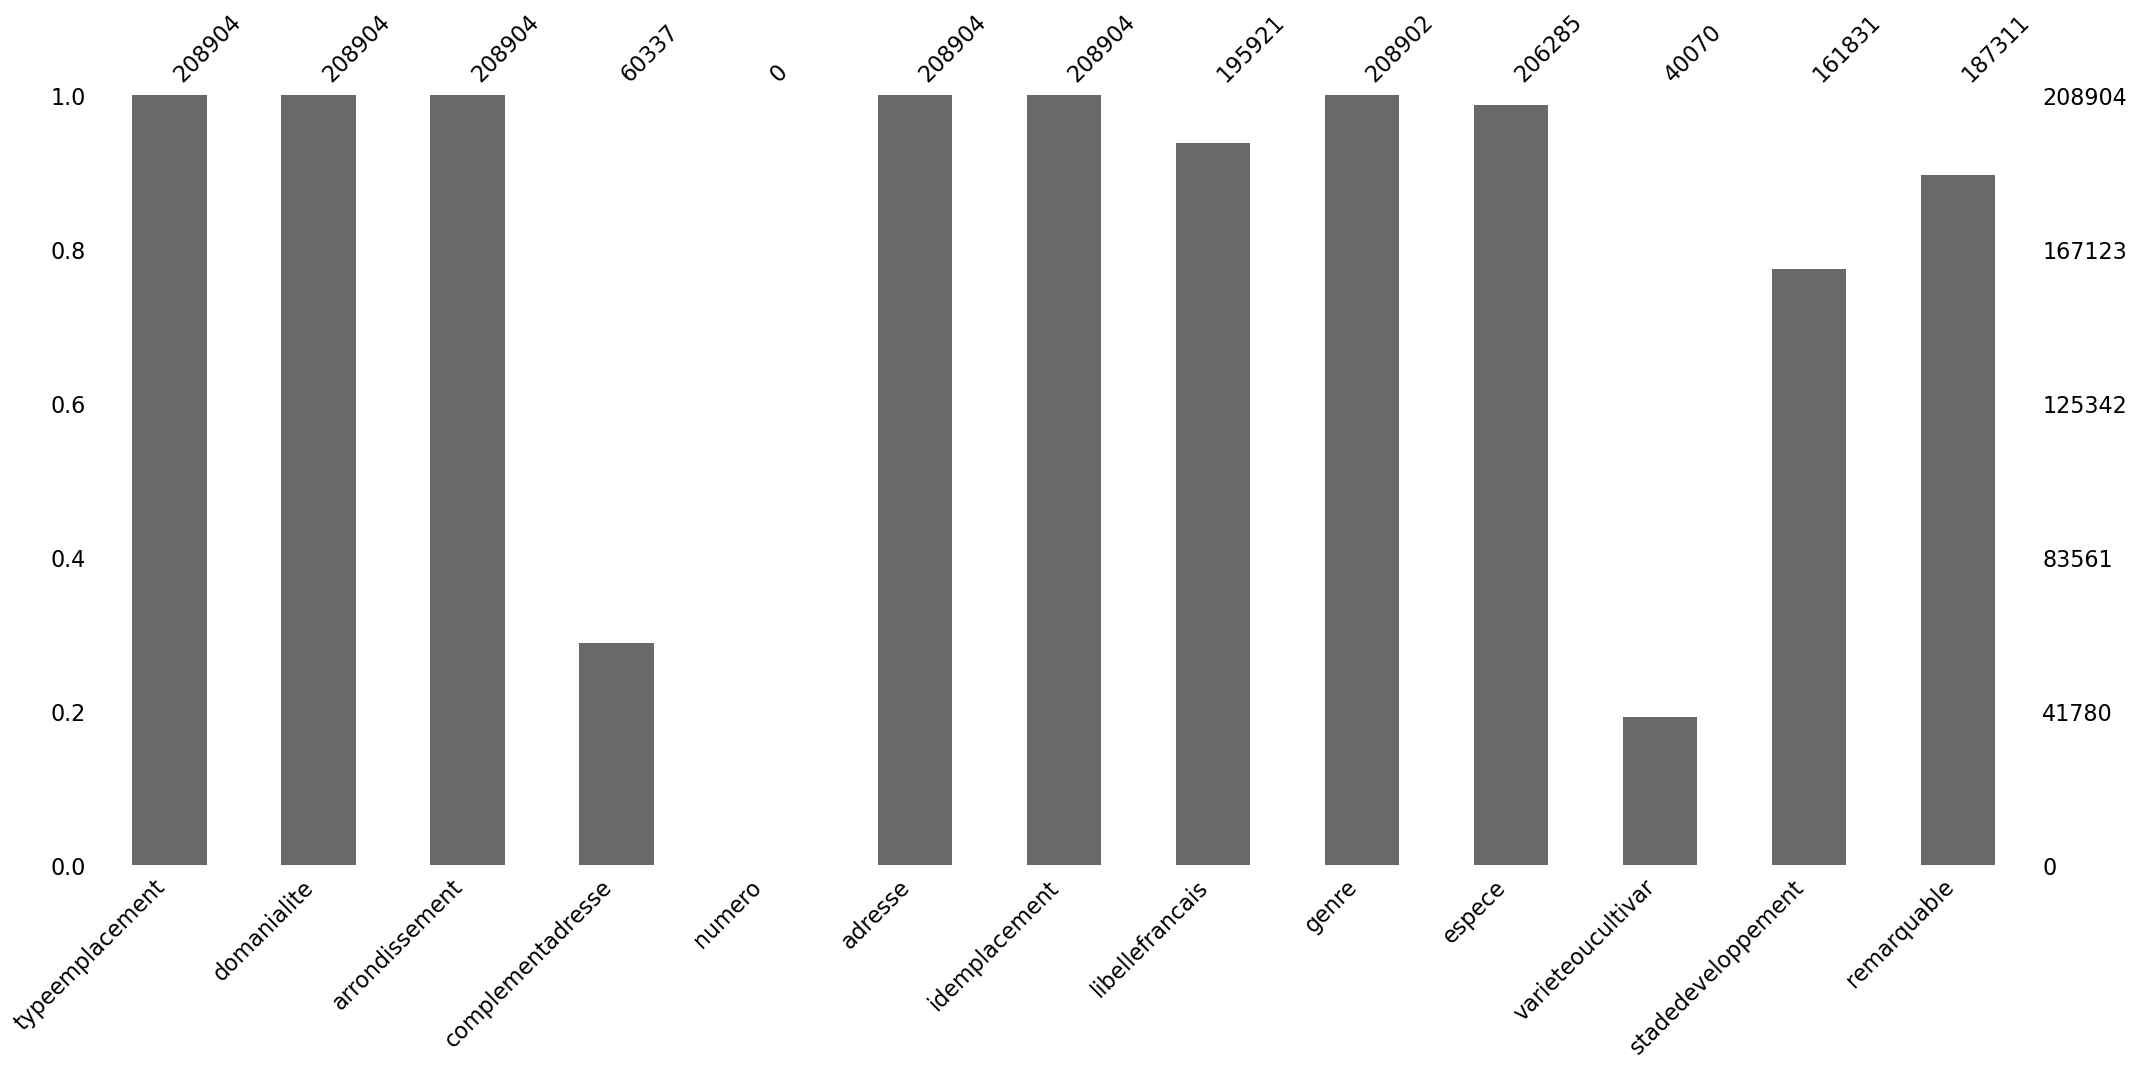

In [7]:
msno.bar(df.select_dtypes('object'))

In [8]:
# Création d'une boucle qui va afficher le nom de la colonne, le nombre de valeurs manquantes
# les valeurs uniques ainsi que leur nombre
for col in df.select_dtypes('object'):
    print("_____",col) 
    print("nbr_nan:",df[col].isna().sum())
    print(df[col].nunique(),"valeurs uniques")
    print(df[col].unique()[:10])
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ typeemplacement
nbr_nan: 0
1 valeurs uniques
['Arbre']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ domanialite
nbr_nan: 0
9 valeurs uniques
['Alignement' 'Jardin' 'CIMETIERE' 'DASCO' 'PERIPHERIQUE' 'DJS' 'DFPE'
 'DAC' 'DASES']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ arrondissement
nbr_nan: 0
25 valeurs uniques
['PARIS 12E ARRDT' 'PARIS 19E ARRDT' 'PARIS 16E ARRDT' 'PARIS 17E ARRDT'
 'PARIS 20E ARRDT' 'BOIS DE VINCENNES' 'PARIS 14E ARRDT'
 'BOIS DE BOULOGNE' 'PARIS 15E ARRDT' 'SEINE-SAINT-DENIS']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ complementadresse
nbr_nan: 148567
5177 valeurs uniques
['23' None 'Canton 03' '203' '268' '6' 'TOURNELLES / VOSGES' '2' '266'
 'F119']
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ numero
nbr_nan: 208904
0 valeurs uniques
[None]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ adresse
nbr_nan: 0
7442 valeurs uniques
['AVENUE DU BEL AIR' 'RUE DE BELLEVILLE'
 'JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE'
 'SQUARE ERNEST GOUIN / 19 RUE EMILE 

**Premières observations**  

**Variables qualitatives**:  

* La colonne **'type_emplacement'** ne contient qu'une valeur **'arbre'**
* La colonne domanialite correspond aux types d'espaces publics :
    * Jardin : espace vert, parc
    *  Alignement : espaces le long des rues
    *  DJS : Equipements sportifs
    *  DFPE : Crèches
    *  Cimetiere : cimetière
    *  
DASC : 	Ecole
    *  es : DAC	Equipements cultu
    *  els
 : ASES	Action so
* La colonne arrondissement comprend tous les arrondissements (1er au 20eme ainsi que le bois de Boulogne, le bois de Vincennes, les Hauts-de-Seine, le Val de Marne et la Seine-Saint-Denis.
* La colonne **complément d'adresse** contient beaucoup de valeurs manquantes.
* Les colonnes **lieu, id_emplacement** ne contiennent pas de valeurs manquantes et désignent un lieu.
* La colonne **libelle_francais** affiche le nom de l'arbre en français. Elle comprend 192 types et 1497 valeurs manquantes.
* Les colonnes **genre, espece et variété** donnent plus d'informations sur le type d'arbre. Elles correspondent à trois niveaux de classification des plantes.
* La colonne **stade_developpement** indique les différents stades de développement des arbres (4 valeurs)ndas)
* 

<Axes: >

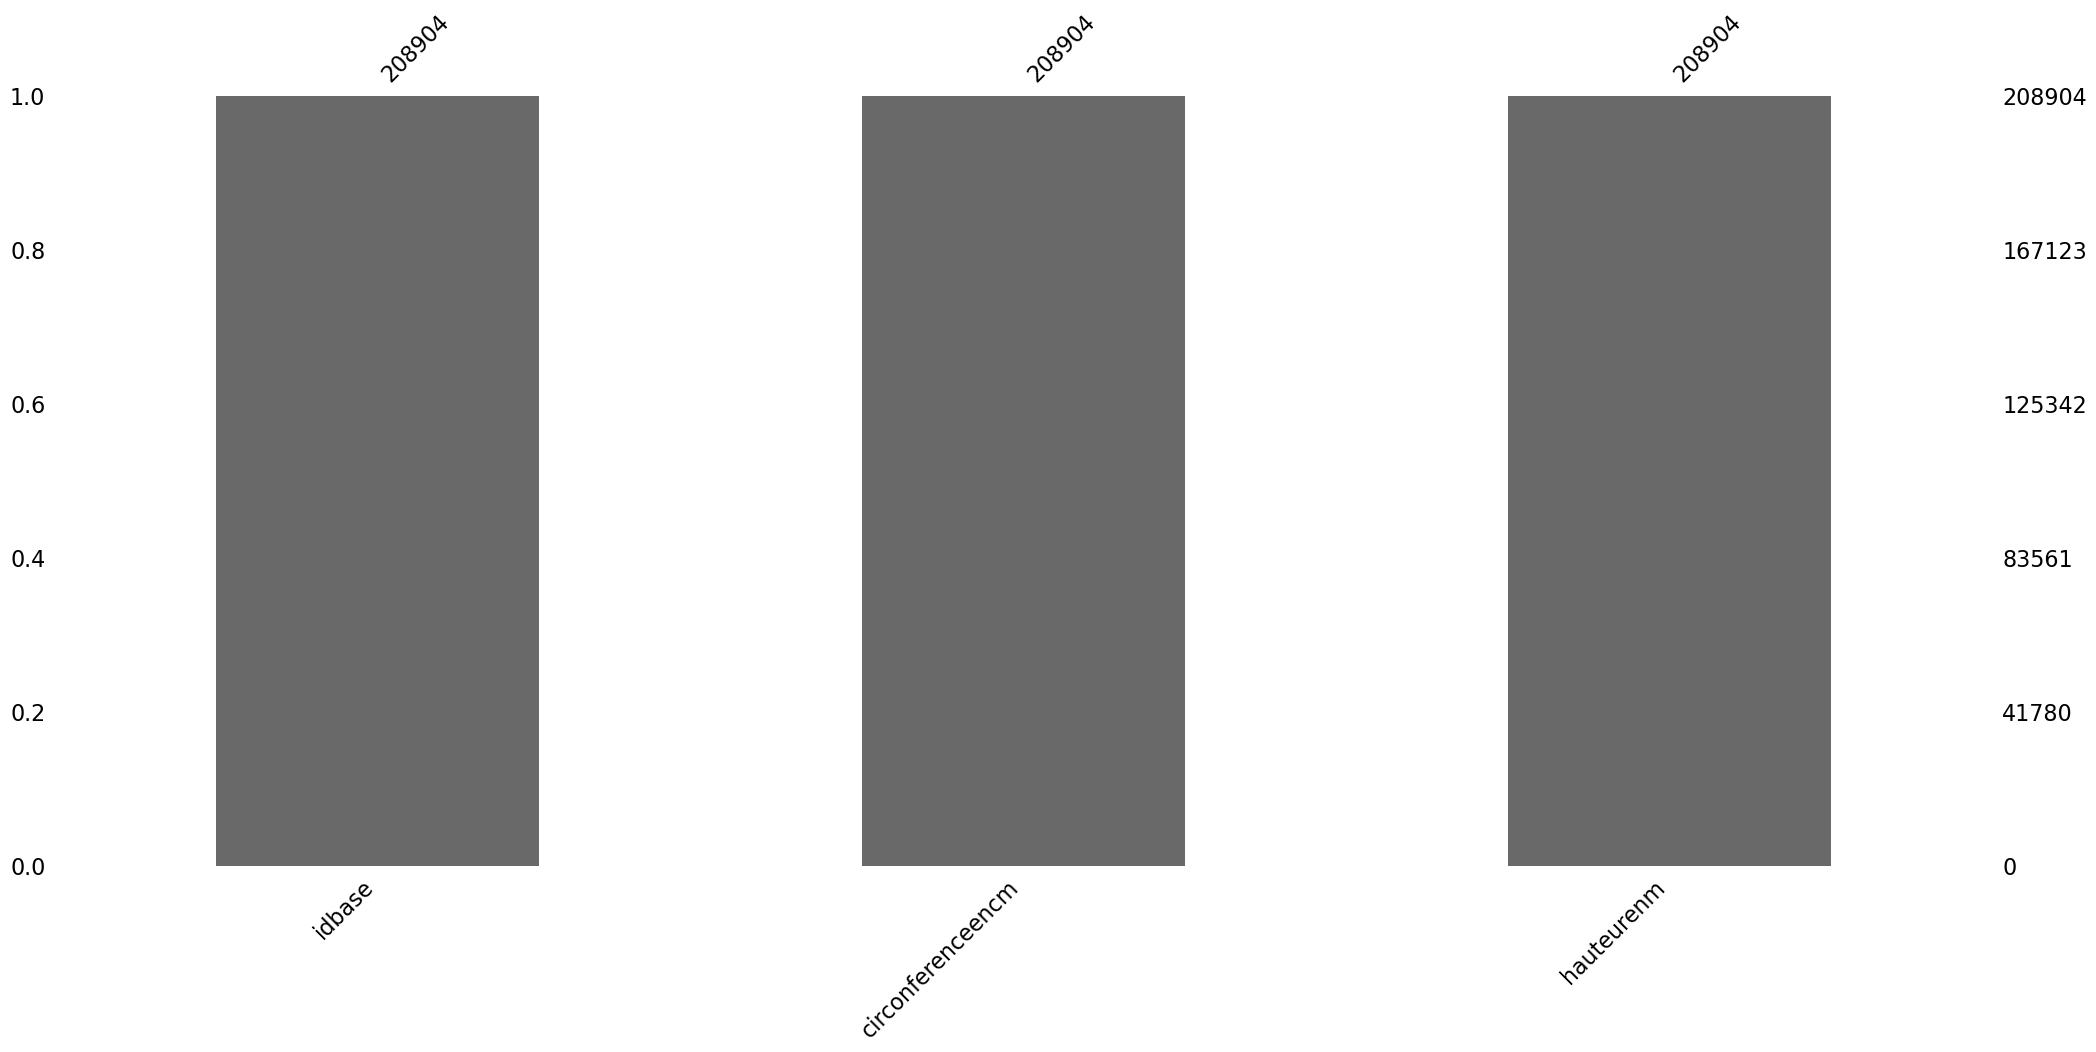

In [9]:
msno.bar(df.select_dtypes('number'))

In [10]:
for col in df.select_dtypes('number'):
    print("_____",col) 
    print("nbr_nan:",df[col].isna().sum())
    print(df[col].nunique(),"valeurs uniques")
    print(df[col].unique()[:10])
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ idbase
nbr_nan: 0
208902 valeurs uniques
[204538 233243 108249 133954 139945 146765 189685 196887 202033 266747]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ circonferenceencm
nbr_nan: 0
458 valeurs uniques
[ 20 120  52  65  85 100 145  60 116  40]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ hauteurenm
nbr_nan: 0
48 valeurs uniques
[ 5 15  3  7  9  8  4 19 10 12]
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _


**Variables quantitatives :**  

* La colonne id correspond à l'id de l'arbre
* La colonne **numero** est **vide**.
* Les colonnes **circonference_cm et hauteur** donne des informations sur la taille de l'arbre et ne contiennent pas de valeurs manquantes.
* La colonne **remarquable** indique quel arbre est dit *remarquable* (Un arbre remarquable est un arbre qui est considéré comme exceptionnel en raison de ses caractéristiques particulières, de son âge, de sa taille, de sa rareté, de son histoire ou de son importance écologique, culturelle ou historique). Elle comprend 63098 valeurs manquantes.
* Les deux dernières colonnes sont des données spatiales qui vont me permettrent d'afficher mes données via Geopandas.

# Traitement des valeurs manquantes

In [11]:
#Je retire les colonnes numero, typeemplacement, complementadresse

df = df.drop(['numero','typeemplacement', 'complementadresse'],axis=1)

In [12]:
df.head()

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
0,204538,Alignement,PARIS 12E ARRDT,AVENUE DU BEL AIR,000103027,Erable,Acer,platanoides,''Columnare'',20,5,Jeune (arbre),NON,POINT (2.39702 48.84681)
1,233243,Alignement,PARIS 19E ARRDT,RUE DE BELLEVILLE,002901003,Sophora,Styphnolobium,japonicum,None,120,15,Adulte,NON,POINT (2.40119 48.87590)
2,108249,Jardin,PARIS 16E ARRDT,JARDINS DU TROCADERO / 3 PLACE DE VARSOVIE,000303010,If,Taxus,baccata,''Lutea'',52,3,Adulte,NON,POINT (2.28903 48.86010)
3,133954,Jardin,PARIS 17E ARRDT,SQUARE ERNEST GOUIN / 19 RUE EMILE LEVEL,000103001,Tilleul,Tilia,x europaea,''Pallida'',65,7,Jeune (arbre)Adulte,NON,POINT (2.31786 48.89408)
4,139945,Jardin,PARIS 19E ARRDT,JARDIN ILOT RIQUET,00000101,Charme,Carpinus,betulus,None,85,9,Adulte,NON,POINT (2.37540 48.89040)


In [13]:
df.columns

Index(['idbase', 'domanialite', 'arrondissement', 'adresse', 'idemplacement',
       'libellefrancais', 'genre', 'espece', 'varieteoucultivar',
       'circonferenceencm', 'hauteurenm', 'stadedeveloppement', 'remarquable',
       'geometry'],
      dtype='object')

<Axes: >

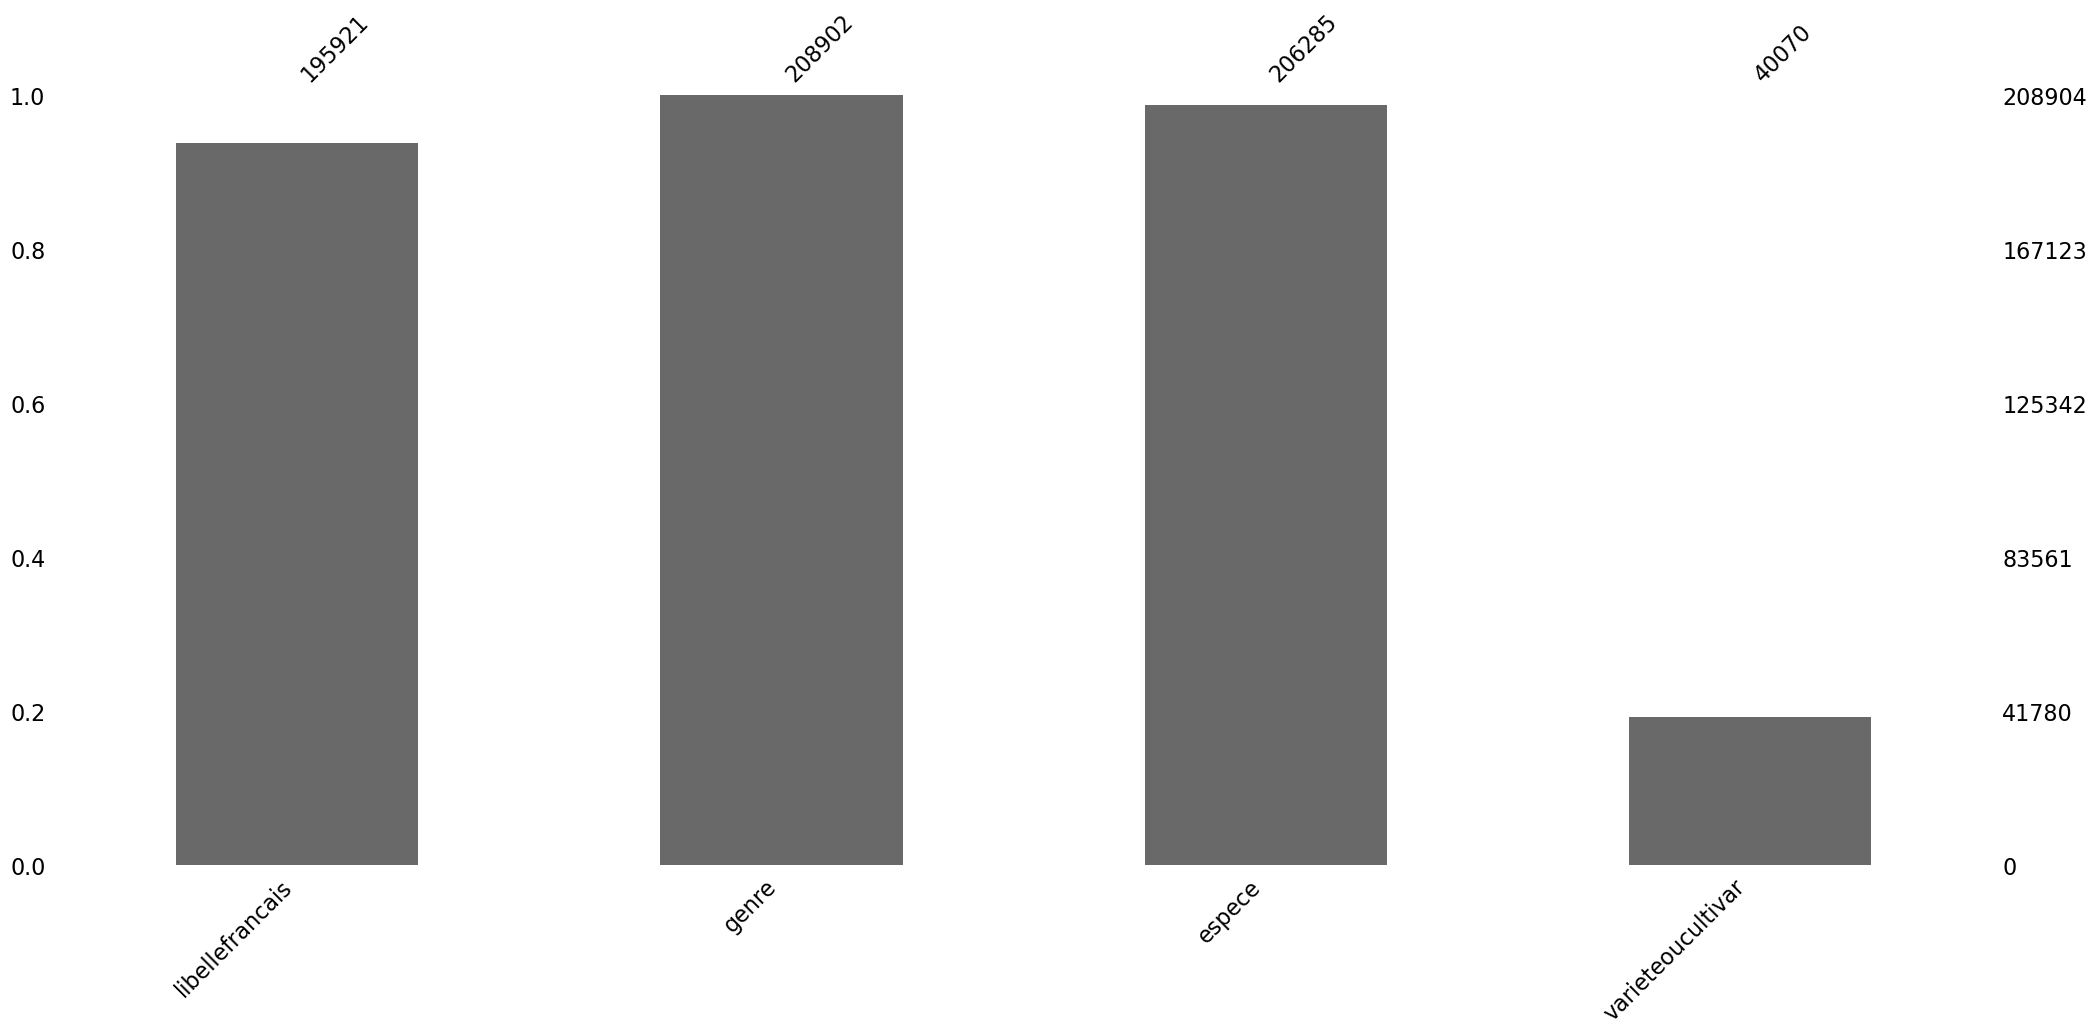

In [14]:
msno.bar(df[['libellefrancais', 'genre', 'espece', 'varieteoucultivar']])

In [15]:
# Je commence par supprimer les lignes pour lesquelles nous n'avons pas d'informations sur l'arbre (type, genre..)
to_drop = df.loc[(df['libellefrancais'].isna()) & (df['genre'].str.contains('Non spécifié')) & (df['espece'].str.contains('n. sp.'))|(df['espece'].isna()),:].index


# Utilisez la méthode drop pour supprimer ces lignes
df = df.drop(to_drop)


In [16]:
df.loc[df['libellefrancais'].isna()][['libellefrancais', 'genre', 'espece']].head(30)


,libellefrancais,genre,espece
37,None,Acer,n. sp.
47,None,Tilia,x europaea
52,None,Malus,n. sp.
84,None,Malus,n. sp.
87,None,Tilia,n. sp.
94,None,Fraxinus,n. sp.
113,None,Cupressus,n. sp.
151,None,Quercus,n. sp.
172,None,Tilia,n. sp.
238,None,Paulownia,n. sp.


In [78]:
correspondances_arbres = {
    'Erable': 'Acer',
    'Tilleul': 'Tilia',
    #'Pommier à fruits': 'Malus /domestica',
    #'Pommier à fleurs': 'Malus /floribunda',
    'Fraxinus': 'Frêne',
    'Cupressus': 'Cyprès',
    'Quercus': 'Chêne',
    'Paulownia': 'Paulownia',
    'Carpinus': 'Charme',
    'Tamaris': 'Tamarix',
    'Troëne': 'Ligustrum',
    #'Poirier à fleurs': 'Pyrus/calleryana',
    #'Poirier à fruits': 'Pyrus/communis',
    'Orme': 'Ulmus',
    'Aubépine': 'Crataegus'
    #'Cerisier à grappes': 'Prunus/padus',
    #'Cerisier à fleurs': 'Prunus/serrulata',
    #'Cerisier à fleurs': 'Prunus/maackii',
    #'Cerisier à fleurs': 'Prunus/x schmittii',
    #'Merisier': 'Prunus/avium',
    #'Faux-cyprès': 'Chamaecyparis'
}

# Remplacez les valeurs manquantes dans 'libellefrancais' en utilisant le dictionnaire
df.loc[df['libellefrancais'].isna(), 'genre'] = df['libellefrancais'].map(correspondances_arbres)



In [79]:
df.loc[df['libellefrancais'].isna(),:]

,idbase,domanialite,arrondissement,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geometry
37,238690,Alignement,PARIS 12E ARRDT,AVENUE DU BEL AIR,000204025,NaN,NaN,n. sp.,None,25,5,Jeune (arbre),NON,POINT (2.39753 48.84661)
47,99923,Jardin,PARIS 16E ARRDT,JARDIN DU RANELAGH,00030002,NaN,NaN,x europaea,''Euchlora'',102,10,Adulte,NON,POINT (2.26796 48.85886)
52,160253,CIMETIERE,SEINE-SAINT-DENIS,CIMETIERE DE PANTIN / DIV 61,D00000061006,NaN,NaN,n. sp.,None,25,4,None,None,POINT (2.41423 48.90903)
84,236766,Jardin,PARIS 13E ARRDT,JARDINETS DE L ESPACE PUBLIC T1 / 7 RUE GEORGE...,000203001,NaN,NaN,n. sp.,None,60,5,Adulte,NON,POINT (2.37300 48.83605)
87,168691,CIMETIERE,VAL-DE-MARNE,CIMETIERE DE THIAIS / AVENUE PRINCIPALE NORD /...,A14100010067,NaN,NaN,n. sp.,None,20,5,None,NON,POINT (2.37126 48.76448)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208829,2016218,Jardin,BOIS DE VINCENNES,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,00190037,NaN,NaN,n. sp.,None,0,0,None,NON,POINT (2.44607 48.83640)
208840,279048,Alignement,PARIS 13E ARRDT,AVENUE LEON BOLLEE,000103015,NaN,NaN,x europaea,''Euchlora'',80,10,Adulte,NON,POINT (2.36380 48.81837)
208849,107375,Jardin,PARIS 7E ARRDT,JARDIN DU CHAMP DE MARS ET PELOUSES DE L ECOLE...,A00702001,NaN,NaN,n. sp.,None,155,14,Adulte,NON,POINT (2.29696 48.85508)
208875,2034345,DASCO,PARIS 14E ARRDT,ECOLE ELEMENTAIRE / 5 SQUARE ALAIN FOURNIER,086702010,NaN,NaN,n. sp.,None,20,3,Jeune (arbre),NON,POINT (2.30813 48.82792)


In [77]:
df.loc[df['libellefrancais'].isna()][['libellefrancais', 'genre', 'espece']].head(30)

,libellefrancais,genre,espece
37,NaN,NaN,n. sp.
47,NaN,NaN,x europaea
52,NaN,NaN,n. sp.
84,NaN,NaN,n. sp.
87,NaN,NaN,n. sp.
172,NaN,NaN,n. sp.
266,NaN,NaN,n. sp.
276,NaN,NaN,x europaea
286,NaN,NaN,n. sp.
299,NaN,NaN,n. sp.


In [34]:
df.loc[df['genre']=='Chamaecyparis'][['libellefrancais','genre','espece']]

,libellefrancais,genre,espece
472,Faux-cyprès,Chamaecyparis,lawsoniana
526,None,Chamaecyparis,n. sp.
577,None,Chamaecyparis,n. sp.
1009,Faux-cyprès,Chamaecyparis,lawsoniana
1144,None,Chamaecyparis,n. sp.
...,...,...,...
207494,Faux-cyprès,Chamaecyparis,lawsoniana
207964,None,Chamaecyparis,n. sp.
208065,None,Chamaecyparis,n. sp.
208556,Faux-cyprès,Chamaecyparis,lawsoniana


In [38]:
df.loc[df['libellefrancais'].isna()][['libellefrancais', 'genre', 'espece', 'varieteoucultivar']].head(30)

,libellefrancais,genre,espece,varieteoucultivar
37,None,Acer,n. sp.,None
47,None,Tilia,x europaea,''Euchlora''
52,None,Malus,n. sp.,None
84,None,Malus,n. sp.,None
87,None,Tilia,n. sp.,None
94,None,Fraxinus,n. sp.,None
113,None,Cupressus,n. sp.,None
151,None,Quercus,n. sp.,None
172,None,Tilia,n. sp.,None
238,None,Paulownia,n. sp.,None


In [45]:
df.groupby('libellefrancais')["genre"].count().sort_values(ascending=False)[:15]

libellefrancais
Platane                 42314
Marronnier              24175
Erable                  18823
Tilleul                 17481
Sophora                 11535
Pin                      4890
Micocoulier              4646
Frêne                    4589
Cerisier à fleurs        4224
Chêne                    4082
Poirier à fleurs         3811
Charme                   3483
Noisetier de Byzance     3358
Peuplier                 2949
Robinier                 2191
Name: genre, dtype: int64

## Préparation de géopandas pour la visualisation des données

In [11]:
# Je crée une colonne de géométrie contenant des objets Point en utilisant la longitude et la latitude du jeu de données.
geometry= df['geometry'];
geometry[:3]

0    POINT (2.39702 48.84681)
1    POINT (2.40119 48.87590)
2    POINT (2.28903 48.86010)
Name: geometry, dtype: geometry

In [12]:
df_geo = gpd.GeoDataFrame(df,crs='epsg:4326',geometry=geometry)

Text(0.5, 1.0, 'arrondissement')

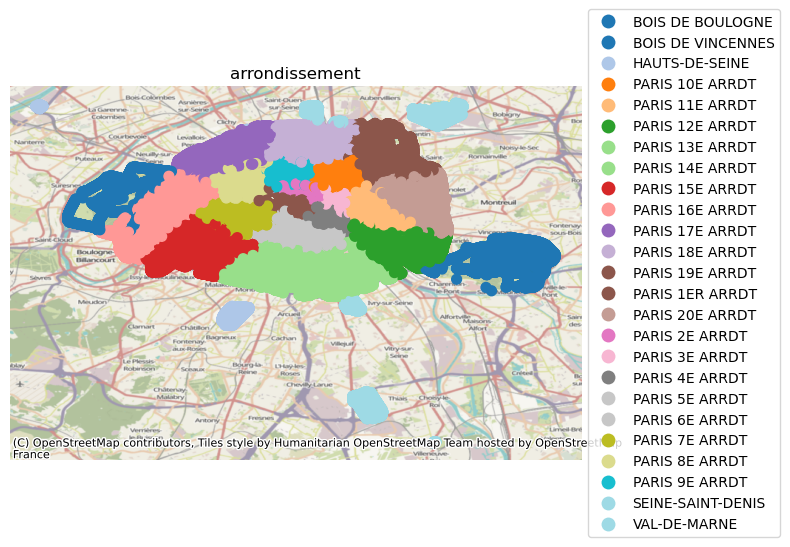

In [13]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(8,10))
# Plot our SF GeoDataFrame
#carte.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
df_geo.plot(ax=ax, column = df_geo['arrondissement'], cmap = 'tab20', marker = 'o', markersize=50,  legend = True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
# Add in a background using contextily
ctx.add_basemap(ax, crs=df_geo.crs.to_string())
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title("arrondissement")

<img src=paris.png width="500" height="200"> <img src=paris_2.jpg width="500" height="200">



In [14]:
df_geo_test = df_geo.loc[~df_geo['arrondissement'].str.contains('ARRDT')]

Text(0.5, 1.0, 'périphérie')

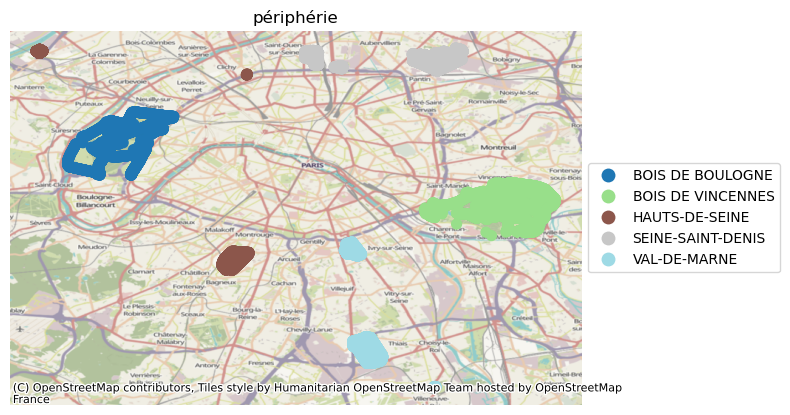

In [15]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(8,10))
# Plot our SF GeoDataFrame
#carte.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
df_geo_test.plot(ax=ax, column = df_geo_test['arrondissement'], cmap = 'tab20', marker = 'o', markersize=50,  legend = True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
# Add in a background using contextily
ctx.add_basemap(ax, crs=df_geo.crs.to_string())
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title("périphérie")

In [16]:
df.columns

Index(['idbase', 'typeemplacement', 'domanialite', 'arrondissement',
       'complementadresse', 'numero', 'adresse', 'idemplacement',
       'libellefrancais', 'genre', 'espece', 'varieteoucultivar',
       'circonferenceencm', 'hauteurenm', 'stadedeveloppement', 'remarquable',
       'geometry'],
      dtype='object')